# Optimization for Training Deep Models

Neural Network training is the most difficult optmization problem involved in deep learning. Owing to this diffculty of training neural networks a specialized of optimization techniques have been developed for solving it. We are concerned with finding parameters $\theta$ that greatly reduce a cost function $J(\theta)$ (which includes a performance measure on the entier training set as well as additional regularization terms).

## 8.1 How Learning Differs from Pure Optimization

In machine learning we care about optimizing a performance measure $P$ that is defined in terms of a test set and mat also be intractable. Therefore, we reduce a different cost function $J(\theta)$ in hope that doing so will improve $P$. This is in contrast to pure optimization where minimizing $J$ is the goal in and of itself. Optimization algorithms for training deep models also include some specialization on the specific structure of machine learning objective f unctions. The cost function can be written as:

$$J(\theta) =  \mathbb{E}_{(x, y)\sim\hat{p}_{data}}L(f(x; \theta), y)$$

where $L$ is the per example loss function, $f(x; \theta)$ is the predicted output when the input is $x$, $\hat{p}_{data}$ is the emperical distribution and $y$ is the target output in the supervised learning case. In general we would prefer to minimize the objective function where the expectation is taken across the _data-generating distribution_ $p_{data}$ rather than the _emperical distribution_ defined over the finite training set.

### 8.1.1 Emperical Risk Minimization

The goal of machine learning is to minimize the expected generalization error over the data generating distribution (this quantity is known as __risk__). If $p_{data}$ was know known then risk minimization would be an optimization problem. When we only have $\hat{p}_{data}$ we have a machine learning problem on our hands. We can convert a machine learning problem back to an optimization problem by optimizing over the emperical distributuion maximizing over the __emperical risk__ via a process called __emperical risk minimization__. But emperical risk minimization suffers from the following issues:

* It is prone to overfitting the training set.

* It might not be feasible in certain cases (such as when the derivatives of a loss function e.g. 0-1 loss aren't meaningful).

### 8.1.2 Surrogate Loss Function and Early Stopping

Due to the fact that the loss function we actually care about (say, classification error on the test set) is sometimes difficult to optimize we optimize what is called a __surrogate loss function__ instead. The negative log-likelihood is typically used as a surrogate for 0-1 loss. The negative log-likelihood allows the model to estimate the conditioanl probablity of the classes given the input and if the model can do that well then it can pick the classes that yield the least classification error in expectation. 


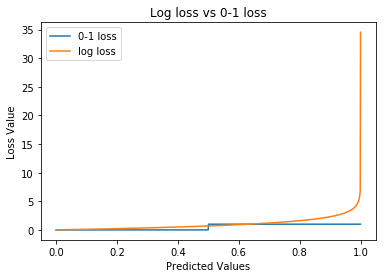

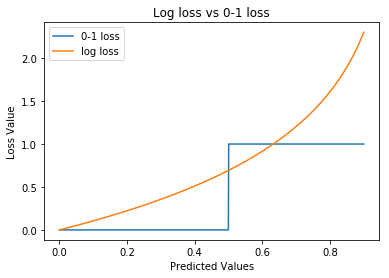

In [21]:
# from matplotlib import pyplot as plt
from sklearn.metrics import zero_one_loss, log_loss
import numpy as np

num_points = 1000
# define a 1000 copies of the same data point such that we can compare zero_one_loss and log_loss for different prediction made for the same point
y_true = np.zeros(num_points, dtype='float32')
# define predictions for each of the 1000 values such that the predictions increase from 0 to 1 in an AP
preds = np.linspace(start=0.0, stop=1.0, num=num_points)

# compute loss for each (true label, prediction) pair
zero_one_values, log_loss_values = [], []
for i in range(num_points):
    zero_one_values.append(zero_one_loss([y_true[i]], [preds[i] > 0.5]))
    log_loss_values.append(log_loss([y_true[i]], [preds[i]], labels=[0, 1]))


def plot_values(preds, zero_one_values, log_loss_values):
    plt.title('Log loss vs 0-1 loss')
    plt.xlabel('Predicted Values')
    plt.ylabel('Loss Value')
    plt.plot(preds, zero_one_values, label='0-1 loss')
    plt.plot(preds, log_loss_values, label='log loss')
    plt.legend()
    plt.show()

    
plot_values(preds, zero_one_values, log_loss_values)

# Now we see in the first image that the value of log loss rightly asymptotes to infinity when prediction is 1 and the true class label is 0. This makes the plot slightly hard to read so let's try to get rid of the last 100 values in all the arrays and plot again.

plot_values(preds[:900], zero_one_values[:900], log_loss_values[:900])



Now we see in the first image that the value of log loss rightly asymptotes to infinity when prediction is 1 and the true class label is 0. This makes the plot slightly hard to read so let's so we got rid of the last 100 values and plotted everything again. This graph is much neater and shows us how the log-loss function has a much more meaningful gradient than 0-1 loss. This also shows us that we can sometimes learn more using a surrogate loss function. Here as our predicted value goes below 0.5 the 0-1 loss becomes zero allowing us to not learn anything further but the log-loss function allows us to make our model more robust by moving the classes apart.

